# Testing IL
In this notebook we will compare the IL of the implemented AMM to theory.


## Simulation Setup

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import math

# Experiments
from model import run
from model import processing
#from model.plot_utils import *
from model import plot_utils as pu
from model import init_utils



########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
# omniHDXABC is HDX shares dedicated to pool of token ABC
# LP1 = {'omniR1': 500000}
# LP2 = {'omniR2': 1500000}
LP1 = {'omniR0':7000, 'omniR1':90000, 'omniR2':13000000, 'omniR3':8300000}
trader = {'HDX': 1000000,'R0': 1000000, 'R1': 1000000, 'R2': 1000000,  'R3': 1000000}

# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader, 'LP1': LP1}
#agent_d = {'Trader': trader, 'LP1': LP1}


########## ACTION CONFIGURATION ##########

action_dict = {
    'sell_hdx_for_r1': {'token_buy': 'R1', 'token_sell': 'HDX', 'amount_sell': 2000, 'action_id': 'Trade', 'agent_id': 'Trader'},
    'sell_r1_for_hdx': {'token_sell': 'R1', 'token_buy': 'HDX', 'amount_sell': 1000, 'action_id': 'Trade', 'agent_id': 'Trader'}
}

# list of (action, number of repititions of action), timesteps = sum of repititions of all actions
trade_count = 5000
action_ls = [('trade', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trade': {'sell_hdx_for_r1': 0.5,
              'sell_r1_for_hdx': 0.5}
}



########## CFMM INITIALIZATION ##########

initial_values = {
    'token_list': ['R0', 'R1', 'R2', 'R3'],
    'R': [7000, 90000,13000000,8300000],
    'P': [16714.28, 1211.11,6.15,1.87],
    'fee_assets': 0.0015,
    'fee_HDX': 0.0015
}

#initial_values['H'] = [initial_values['Q'] * initial_values['W'][i] for i in range(len(initial_values['token_list']))]
#initial_values['D'] = copy.deepcopy(initial_values['H'])

#amms = [balancer_amm, reweighting_amm]
#amm_types = ['Balancer', 'Reweighting']
#amms = [reweighting_amm]
#amm_types = ['Reweighting']
#labels = amm_types
initial_list = []
config_params = {
    #'amm': amm,
    'cfmm_type': "",
    'initial_values': initial_values,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()


init shares called
agent_d {'Trader': {'q': 1000000, 's': [0, 0, 0, 0], 'r': [1000000, 1000000, 1000000, 1000000], 'p': [0, 0, 0, 0]}, 'LP1': {'q': 0, 's': [7000, 90000, 13000000, 8300000], 'r': [0, 0, 0, 0], 'p': [16714.28, 1211.11, 6.15, 1.87]}}
agent shares [7000, 90000, 13000000, 8300000]

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (5000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 2.88s


In [2]:
rdf, agent_df = processing.postprocessing(events)


In [3]:
%matplotlib inline



In [4]:
rdf.head(20)  # Todo: delete

R-0      R-1       R-2      R-3          Q-0          Q-1         Q-2  \
0   7000 90000.00  13000000  8300000 116999960.00 108999900.00 79950000.00   
3   7000 91000.00  13000000  8300000 116999960.00 107802098.90 79950000.00   
6   7000 90998.31  13000000  8300000 116999960.00 107804101.90 79950000.00   
9   7000 90996.63  13000000  8300000 116999960.00 107806104.90 79950000.00   
12  7000 90994.94  13000000  8300000 116999960.00 107808107.90 79950000.00   
15  7000 91994.94  13000000  8300000 116999960.00 106636216.23 79950000.00   
18  7000 92994.94  13000000  8300000 116999960.00 105489527.89 79950000.00   
21  7000 93994.94  13000000  8300000 116999960.00 104367238.50 79950000.00   
24  7000 93993.14  13000000  8300000 116999960.00 104369241.50 79950000.00   
27  7000 93991.35  13000000  8300000 116999960.00 104371244.50 79950000.00   
30  7000 93989.55  13000000  8300000 116999960.00 104373247.50 79950000.00   
33  7000 93987.75  13000000  8300000 116999960.00 104375250.50 79950000.00   
36  7000 94987.75  13000000  8300000 116999960.00 103276421.95 79950000.00   
39  7000 94985.91  13000000  8300000 116999960.00 103278424.95 79950000.00   
42  7000 94984.08  13000000  8300000 116999960.00 103280427.95 79950000.00   
45  7000 95984.08  13000000  8300000 116999960.00 102204411.68 79950000.00   
48  7000 96984.08  13000000  8300000 116999960.00 101150584.95 79950000.00   
51  7000 96982.16  13000000  8300000 116999960.00 101152587.95 79950000.00   
54  7000 97982.16  13000000  8300000 116999960.00 100120230.77 79950000.00   
57  7000 98982.16  13000000  8300000 116999960.00  99108733.05 79950000.00   

           Q-3   S-0    S-1  ...  token_list-2  token_list-3  fee_assets  \
0  15521000.00  7000  90000  ...            R2            R3        0.00   
3  15521000.00  7000  90000  ...            R2            R3        0.00   
6  15521000.00  7000  90000  ...            R2            R3        0.00   
9  15521000.00  7000  90000  ...            R2            R3        0.00   
12 15521000.00  7000  90000  ...            R2            R3        0.00   
15 15521000.00  7000  90000  ...            R2            R3        0.00   
18 15521000.00  7000  90000  ...            R2            R3        0.00   
21 15521000.00  7000  90000  ...            R2            R3        0.00   
24 15521000.00  7000  90000  ...            R2            R3        0.00   
27 15521000.00  7000  90000  ...            R2            R3        0.00   
30 15521000.00  7000  90000  ...            R2            R3        0.00   
33 15521000.00  7000  90000  ...            R2            R3        0.00   
36 15521000.00  7000  90000  ...            R2            R3        0.00   
39 15521000.00  7000  90000  ...            R2            R3        0.00   
42 15521000.00  7000  90000  ...            R2            R3        0.00   
45 15521000.00  7000  90000  ...            R2            R3        0.00   
48 15521000.00  7000  90000  ...            R2            R3        0.00   
51 15521000.00  7000  90000  ...            R2            R3        0.00   
54 15521000.00  7000  90000  ...            R2            R3        0.00   
57 15521000.00  7000  90000  ...            R2            R3        0.00   

    fee_HDX  n  simulation  subset  run  substep  timestep  
0      0.00  4           0       0    1        0         0  
3      0.00  4           0       0    1        3         1  
6      0.00  4           0       0    1        3         2  
9      0.00  4           0       0    1        3         3  
12     0.00  4           0       0    1        3         4  
15     0.00  4           0       0    1        3         5  
18     0.00  4           0       0    1        3         6  
21     0.00  4           0       0    1        3         7  
24     0.00  4           0       0    1        3         8  
27     0.00  4           0       0    1        3         9  
30     0.00  4           0       0    1        3        10  
33     0.00  4           0       0   

In [5]:
agent_df.tail(20)  # TODO: delete

simulation  subset  run  substep  timestep agent_label            q  \
29946           0       0    1        3      4991      Trader 104473527.90   
29947           0       0    1        3      4991         LP1         0.00   
29952           0       0    1        3      4992      Trader 104476457.40   
29953           0       0    1        3      4992         LP1         0.00   
29958           0       0    1        3      4993      Trader 104479383.71   
29959           0       0    1        3      4993         LP1         0.00   
29964           0       0    1        3      4994      Trader 104482306.82   
29965           0       0    1        3      4994         LP1         0.00   
29970           0       0    1        3      4995      Trader 104480306.82   
29971           0       0    1        3      4995         LP1         0.00   
29976           0       0    1        3      4996      Trader 104483228.92   
29977           0       0    1        3      4996         LP1         0.00   
29982           0       0    1        3      4997      Trader 104481228.92   
29983           0       0    1        3      4997         LP1         0.00   
29988           0       0    1        3      4998      Trader 104484150.02   
29989           0       0    1        3      4998         LP1         0.00   
29994           0       0    1        3      4999      Trader 104487067.93   
29995           0       0    1        3      4999         LP1         0.00   
30000           0       0    1        3      5000      Trader 104485067.93   
30001           0       0    1        3      5000         LP1         0.00   

        s-0    s-1       s-2      s-3      r-0        r-1      r-2      r-3  \
29946     0      0         0        0  1000000 -739637.80  1000000  1000000   
29947  7000  90000  13000000  8300000        0       0.00        0        0   
29952     0      0         0        0  1000000 -740637.80  1000000  1000000   
29953  7000  90000  13000000  8300000        0       0.00        0        0   
29958     0      0         0        0  1000000 -741637.80  1000000  1000000   
29959  7000  90000  13000000  8300000        0       0.00        0        0   
29964     0      0         0        0  1000000 -742637.80  1000000  1000000   
29965  7000  90000  13000000  8300000        0       0.00        0        0   
29970     0      0         0        0  1000000 -741955.53  1000000  1000000   
29971  7000  90000  13000000  8300000        0       0.00        0        0   
29976     0      0         0        0  1000000 -742955.53  1000000  1000000   
29977  7000  90000  13000000  8300000        0       0.00        0        0   
29982     0      0         0        0  1000000 -742273.03  1000000  1000000   
29983  7000  90000  13000000  8300000        0       0.00        0        0   
29988     0      0         0        0  1000000 -743273.03  1000000  1000000   
29989  7000  90000  13000000  8300000        0       0.00        0        0   
29994     0      0         0        0  1000000 -744273.03  1000000  1000000   
29995  7000  90000  13000000  8300000        0       0.00        0        0   
30000     0      0         0        0  1000000 -743589.54  1000000  1000000   
30001  7000  90000  13000000  8300000        0       0.00        0        0   

           p-0     p-1  p-2  p-3  
29946     0.00    0.00 0.00 0.00  
29947 16714.28 1211.11 6.15 1.87  
29952     0.00    0.00 0.00 0.00  
29953 16714.28 1211.11 6.15 1.87  
29958     0.00    0.00 0.00 0.00  
29959 16714.28 1211.11 6.15 1.87  
29964     0.00    0.00 0.00 0.00  
29965 16714.28 1211.11 6.15 1.87  
29970     0.00    0.00 0.00 0.00  
29971 16714.28 1211.11 6.15 1.87  
29976     0.00    0.00 0.00 0.00  
29977 16714.28 1211.11 6.15 1.87  
29982     0.00    0.00 0.00 0.00  
29983 16714.28 1211.11 6.15 1.87  
29988     0.00    0.00 0.00 0.00  
29989 16714.28 1211.11 6.15 1.87  
29994     0.00    0.00 0.00 0.00  
29995 16714.28 1211.11 6.15 1.87  
30000     0.00    0.00 0.00 0.00  
30001 16

## Analysis

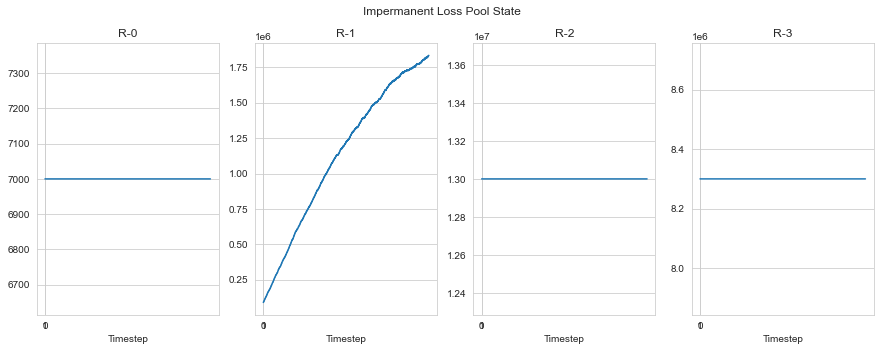

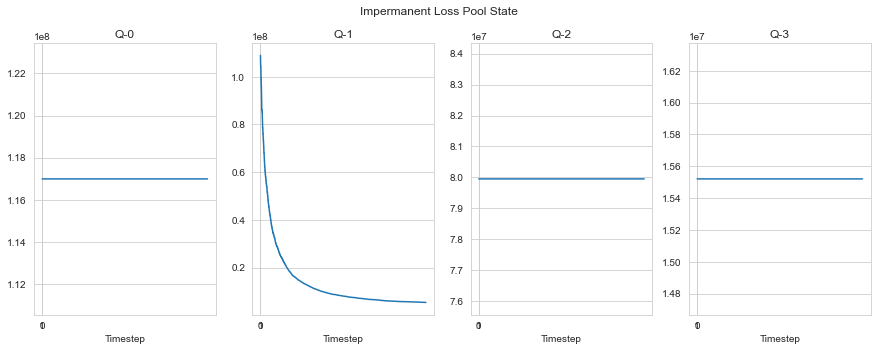

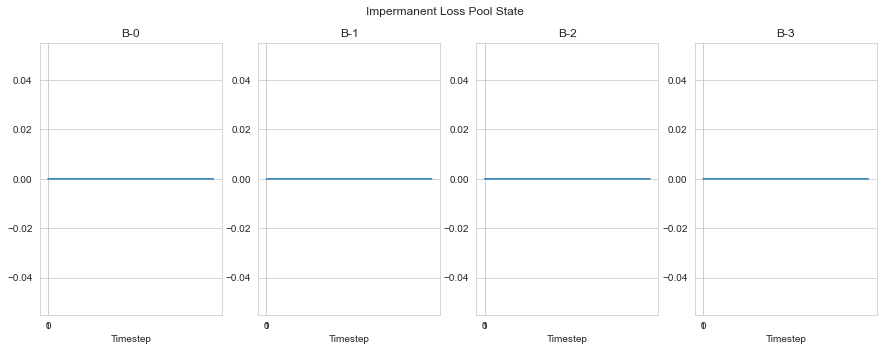

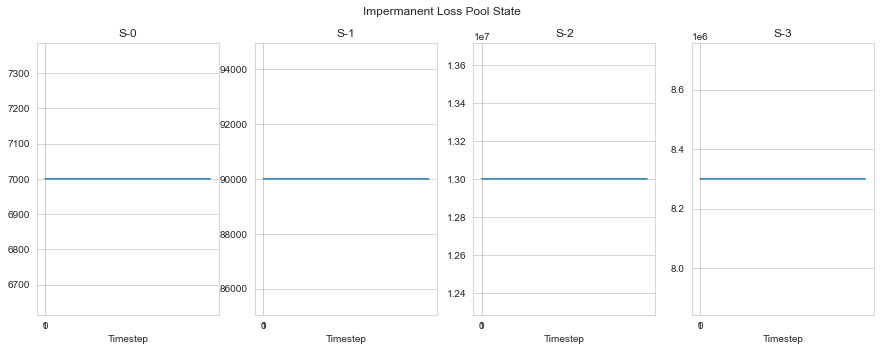

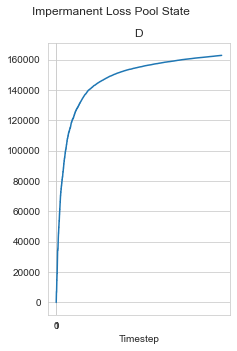

In [6]:
var_list = ['R', 'Q', 'B','S','D']
pu.plot_state(rdf, var_list, plot_title='Impermanent Loss Pool State')

[0]


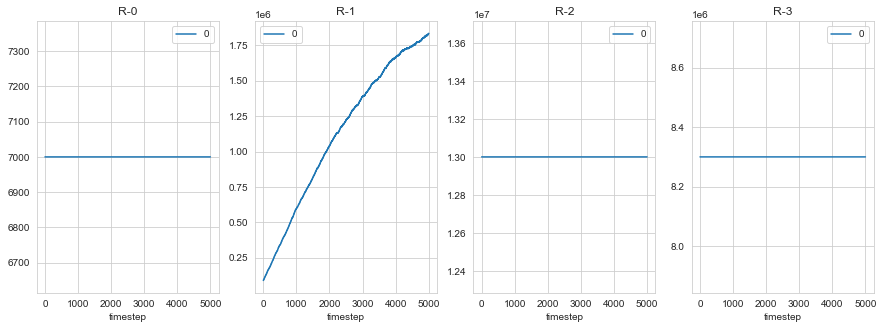

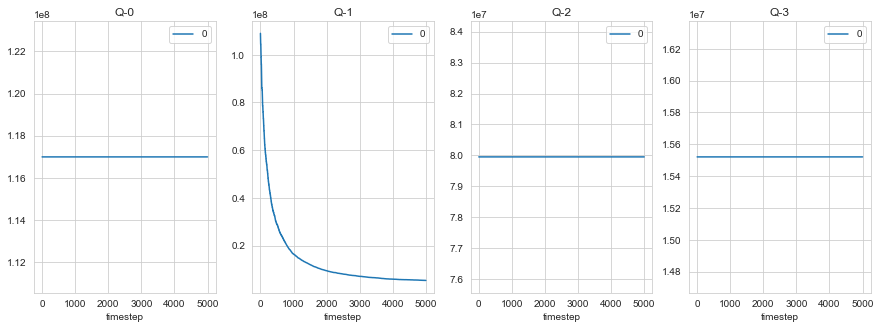

In [7]:
var_list = ['R', 'Q']
pu.plot_vars(rdf, var_list)


[0]


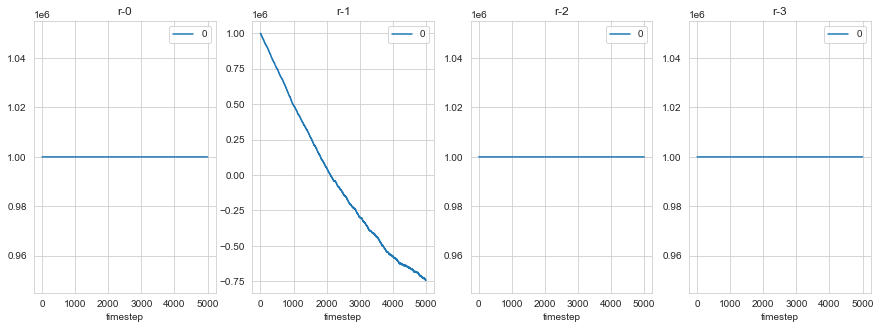

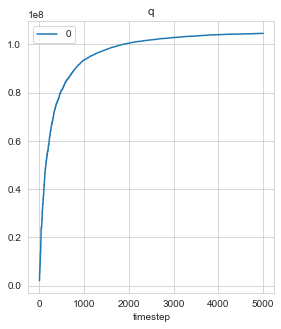

In [8]:
var_list = ['r', 'q']
trader_df = agent_df[agent_df['agent_label'] == 'Trader']
pu.plot_vars(trader_df, var_list)


In [9]:
# merge agent_df, rdf to one df on timesteps, run, etc

merged_df = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])

In [10]:
# add IL column to agent DF, where val_hold is calculated using initial holdings from agent_d
#val hold: withdraw liquidity at t=0, calculate value with prices at t
#val pool: withdraw liquidity at t, calculate value with prices at t

merged_df['P-0'] = merged_df.apply(lambda x: x['Q-0']/x['R-0'], axis=1)
merged_df['P-3'] = merged_df.apply(lambda x: x['Q-3']/x['R-3'], axis=1)
merged_df['P-2'] = merged_df.apply(lambda x: x['Q-2']/x['R-2'], axis=1)
merged_df['P-1'] = merged_df.apply(lambda x: x['Q-1']/x['R-1'], axis=1)
merged_df['val_pool'] = merged_df.apply(lambda x: processing.val_pool(x), axis=1)
withdraw_agent_d = processing.get_withdraw_agent_d(initial_values, agent_d)
print(withdraw_agent_d)
merged_df['val_hold'] = merged_df.apply(lambda x: processing.val_hold(x, withdraw_agent_d), axis=1)
merged_df['IL'] = merged_df.apply(lambda x: x['val_pool']/x['val_hold'] - 1, axis=1)
merged_df['pool_val'] = merged_df.apply(lambda x: processing.pool_val(x), axis=1)
#merged_df['pool_loss'] = merged_df.apply(lambda x: x['pool_val']/2000000 - 1, axis=1)

merged_df[['timestep', 'agent_label', 'q','Q-1','B-1','s-1','S-1','r-1','R-1','val_pool', 'val_hold','IL','pool_val', 'p-1']].tail()


# compute val hold column


# compute val pool column

# compute IL

# plot Impermanent loss
# 

{'token_list': ['R0', 'R1', 'R2', 'R3'], 'Q': [116999959.99999999, 107802098.90109889, 79950000.0, 15521000.0], 'R': [7000, 91000.0, 13000000, 8300000], 'A': [0, 0, 0, 0], 'D': 1796.7016483516395, 'S': [7000, 90000, 13000000, 8300000], 'B': [0, 0, 0, 0], 'H': None, 'T': None}, {'r': [1000000, 999000.0, 1000000, 1000000], 's': [0, 0, 0, 0], 'p': [0.0, 0.0, 0.0, 0.0], 'q': 2196004.397252747},Trader
{'token_list': ['R0', 'R1', 'R2', 'R3'], 'Q': [116999959.99999999, 107802098.90109889, 79950000.0, 15521000.0], 'R': [7000, 91000.0, 13000000, 8300000], 'A': [0, 0, 0, 0], 'D': 1796.7016483516395, 'S': [7000, 90000, 13000000, 8300000], 'B': [0, 0, 0, 0], 'H': None, 'T': None}, {'r': [0, 0.0, 0, 0], 's': [7000, 90000, 13000000, 8300000], 'p': [16714.28, 1211.11, 6.15, 1.87], 'q': 0.0},LP1
{'token_list': ['R0', 'R1', 'R2', 'R3'], 'Q': [116999959.99999999, 107804101.90115456, 79950000.0, 15521000.0], 'R': [7000, 90998.31428487551, 13000000, 8300000], 'A': [0, 0, 0, 0], 'D': 1796.7016483516395, 'S

timestep agent_label            q        Q-1  B-1    s-1    S-1  \
9995      4998         LP1         0.00 5360281.15    0  90000  90000   
9996      4999      Trader 104487067.93 5357358.86    0      0  90000   
9997      4999         LP1         0.00 5357358.86    0  90000  90000   
9998      5000      Trader 104485067.93 5359361.86    0      0  90000   
9999      5000         LP1         0.00 5359361.86    0  90000  90000   

            r-1        R-1       val_pool       val_hold    IL     pool_val  \
9995       0.00 1833273.03   212496779.46   212734109.73 -0.00 217831241.15   
9996 -744273.03 1834273.03 16824613270.66 16726220698.71  0.01 217828318.86   
9997       0.00 1834273.03   212496737.32   212733822.88 -0.00 217828318.86   
9998 -743589.54 1833589.54 16824611645.07 16726222879.82  0.01 217830321.86   
9999       0.00 1833589.54   212496766.17   212734019.18 -0.00 217830321.86   

         p-1  
9995 1211.11  
9996    0.00  
9997 1211.11  
9998    0.00  
9999 1211.11

In [11]:
merged_df[merged_df['agent_label'] == 'LP1'][['timestep', 'agent_label', 'q','Q-0','B-0','s-0','S-0','r-0','R-0','val_pool', 'val_hold','IL','pool_val']].head(20)


timestep agent_label    q          Q-0  B-0   s-0   S-0  r-0   R-0  \
1          1         LP1 0.00 116999960.00    0  7000  7000    0  7000   
3          2         LP1 0.00 116999960.00    0  7000  7000    0  7000   
5          3         LP1 0.00 116999960.00    0  7000  7000    0  7000   
7          4         LP1 0.00 116999960.00    0  7000  7000    0  7000   
9          5         LP1 0.00 116999960.00    0  7000  7000    0  7000   
11         6         LP1 0.00 116999960.00    0  7000  7000    0  7000   
13         7         LP1 0.00 116999960.00    0  7000  7000    0  7000   
15         8         LP1 0.00 116999960.00    0  7000  7000    0  7000   
17         9         LP1 0.00 116999960.00    0  7000  7000    0  7000   
19        10         LP1 0.00 116999960.00    0  7000  7000    0  7000   
21        11         LP1 0.00 116999960.00    0  7000  7000    0  7000   
23        12         LP1 0.00 116999960.00    0  7000  7000    0  7000   
25        13         LP1 0.00 116999960.00    0  7000  7000    0  7000   
27        14         LP1 0.00 116999960.00    0  7000  7000    0  7000   
29        15         LP1 0.00 116999960.00    0  7000  7000    0  7000   
31        16         LP1 0.00 116999960.00    0  7000  7000    0  7000   
33        17         LP1 0.00 116999960.00    0  7000  7000    0  7000   
35        18         LP1 0.00 116999960.00    0  7000  7000    0  7000   
37        19         LP1 0.00 116999960.00    0  7000  7000    0  7000   
39        20         LP1 0.00 116999960.00    0  7000  7000    0  7000   

       val_pool     val_hold    IL     pool_val  
1  319081911.85 319088420.45 -0.00 320273058.90  
3  319085892.49 319092376.53 -0.00 320275061.90  
5  319089873.17 319096332.69 -0.00 320277064.90  
7  319093853.89 319100288.91 -0.00 320279067.90  
9  316769673.81 316794731.97 -0.00 319107176.23  
11 314508482.99 314563151.25 -0.00 317960487.89  
13 312308248.88 312402415.47 -0.00 316838198.50  
15 312312161.20 312406245.50 -0.00 316840201.50  
17 312316073.55 312410075.60 -0.00 316842204.50  
19 312319985.95 312413905.78 -0.00 316844207.50  
21 312323898.39 312417736.03 -0.00 316846210.50  
23 310182247.82 310324399.29 -0.00 315747381.95  
25 310186137.10 310328189.29 -0.00 315749384.95  
27 310190026.42 310331979.37 -0.00 315751387.95  
29 308105303.23 308303492.02 -0.00 314675371.68  
31 306075910.09 306337427.64 -0.00 313621544.95  
33 306079752.56 306341139.62 -0.00 313623547.95  
35 304103844.89 304434850.53 -0.00 312591190.77  
37 302179848.04 302586045.83 -0.00 311579693.05  
39 302183643.10 302589682.88 -0.00 311581696.05

In [12]:
LP1_merged_df = merged_df[merged_df['agent_label'] == 'LP1']
LP1_merged_df[['timestep', 'agent_label', 'q','Q-0','B-0','s-0','S-0','r-0','R-0','val_pool', 'val_hold','IL','pool_val']].head(50)

timestep agent_label    q          Q-0  B-0   s-0   S-0  r-0   R-0  \
1          1         LP1 0.00 116999960.00    0  7000  7000    0  7000   
3          2         LP1 0.00 116999960.00    0  7000  7000    0  7000   
5          3         LP1 0.00 116999960.00    0  7000  7000    0  7000   
7          4         LP1 0.00 116999960.00    0  7000  7000    0  7000   
9          5         LP1 0.00 116999960.00    0  7000  7000    0  7000   
11         6         LP1 0.00 116999960.00    0  7000  7000    0  7000   
13         7         LP1 0.00 116999960.00    0  7000  7000    0  7000   
15         8         LP1 0.00 116999960.00    0  7000  7000    0  7000   
17         9         LP1 0.00 116999960.00    0  7000  7000    0  7000   
19        10         LP1 0.00 116999960.00    0  7000  7000    0  7000   
21        11         LP1 0.00 116999960.00    0  7000  7000    0  7000   
23        12         LP1 0.00 116999960.00    0  7000  7000    0  7000   
25        13         LP1 0.00 116999960.00    0  7000  7000    0  7000   
27        14         LP1 0.00 116999960.00    0  7000  7000    0  7000   
29        15         LP1 0.00 116999960.00    0  7000  7000    0  7000   
31        16         LP1 0.00 116999960.00    0  7000  7000    0  7000   
33        17         LP1 0.00 116999960.00    0  7000  7000    0  7000   
35        18         LP1 0.00 116999960.00    0  7000  7000    0  7000   
37        19         LP1 0.00 116999960.00    0  7000  7000    0  7000   
39        20         LP1 0.00 116999960.00    0  7000  7000    0  7000   
41        21         LP1 0.00 116999960.00    0  7000  7000    0  7000   
43        22         LP1 0.00 116999960.00    0  7000  7000    0  7000   
45        23         LP1 0.00 116999960.00    0  7000  7000    0  7000   
47        24         LP1 0.00 116999960.00    0  7000  7000    0  7000   
49        25         LP1 0.00 116999960.00    0  7000  7000    0  7000   
51        26         LP1 0.00 116999960.00    0  7000  7000    0  7000   
53        27         LP1 0.00 116999960.00    0  7000  7000    0  7000   
55        28         LP1 0.00 116999960.00    0  7000  7000    0  7000   
57        29         LP1 0.00 116999960.00    0  7000  7000    0  7000   
59        30         LP1 0.00 116999960.00    0  7000  7000    0  7000   
61        31         LP1 0.00 116999960.00    0  7000  7000    0  7000   
63        32         LP1 0.00 116999960.00    0  7000  7000    0  7000   
65        33         LP1 0.00 116999960.00    0  7000  7000    0  7000   
67        34         LP1 0.00 116999960.00    0  7000  7000    0  7000   
69        35         LP1 0.00 116999960.00    0  7000  7000    0  7000   
71        36         LP1 0.00 116999960.00    0  7000  7000    0  7000   
73        37         LP1 0.00 116999960.00    0  7000  7000    0  7000   
75        38         LP1 0.00 116999960.00    0  7000  7000    0  7000   
77        39         LP1 0.00 116999960.00    0  7000  7000    0  7000   
79        40         LP1 0.00 116999960.00    0  7000  7000    0  7000   
81        41         LP1 0.00 116999960.00    0  7000  7000    0  7000   
83        42         LP1 0.00 116999960.00    0  7000  7000    0  7000   
85        43         LP1 0.00 116999960.00    0  7000  7000    0  7000   
87        44         LP1 0.00 116999960.00    0  7000  7000    0  7000   
89        45         LP1 0.00 116999960.00    0  7000  7000    0  7000   
91        46         LP1 0.00 116999960.00    0  7000  7000    0  7000   
93        47         LP1 0.00 116999960.00    0  7000  7000    0  7000   
95        48         LP1 0.00 116999960.00    0  7000  7000    0  7000   
97        49         LP1 0.00 116999960.00    0  7000  7000    0  7000   
99        50         LP1 0.00 116999960.00    0  7000  7000    0  7000   

       val_pool     val_hold    IL     pool_val  
1  319081911.85 319088420.45 -0.00 320273058.90  
3  319085892.49 319092376.53 -0.00 320275061.90  
5  319089873.17 319096332.69 -0.00 320277064.90  
7  319093853.89 319100288.91 

## IL over time



[0]


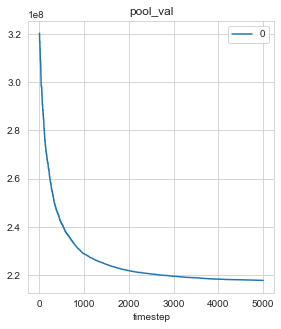

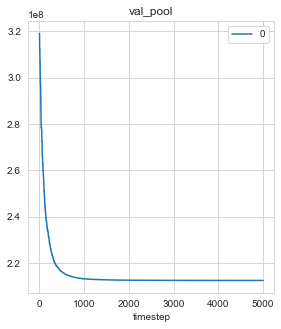

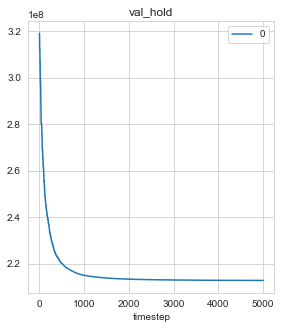

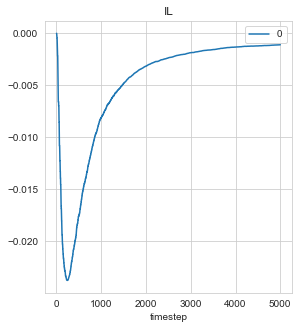

In [13]:
var_list = ['pool_val', 'val_pool', 'val_hold', 'IL']
LP1_merged_df = merged_df[merged_df['agent_label'] == 'LP1']
pu.plot_vars(LP1_merged_df, var_list)

## IL as a function of price movement

### Theory

On a price move from $p_i^Q \to k p_i^Q$, LP is entitled to $k\frac{\sqrt{k}}{k+1}$ of the *original value* of the matched pool.
$$
Val_{hold} = k p_i^Q R_i\\
Val_{pool} = \frac{\sqrt{k}k}{k+1} 2Q_i = \left(\frac{2\sqrt{k}k}{k+1}\right) p_i^Q R_i
$$

### $Val_{hold}$

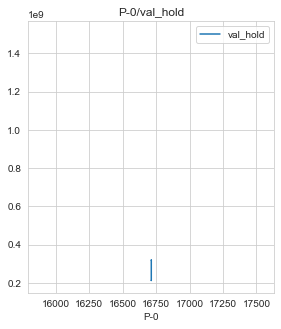

In [14]:
def val_hold_func(P, R):
    return P * R

plt.figure(figsize=(15,5))

#ax = plt.subplot(131, title='P-0/IL')
#LP1_merged_df[['IL','P-0']].astype(float).plot(ax=ax, y=['IL'], x='P-0', label=[])
ax = plt.subplot(131, title='P-0/val_hold')
LP1_merged_df[['val_hold','P-0']].astype(float).plot(ax=ax, y=['val_hold'], x='P-0', label=[])

#ax = plt.subplot(132, title='Theoretical')
x = LP1_merged_df['P-0'].tolist()
y = LP1_merged_df.apply(lambda x: val_hold_func(x['P-0'], LP1['omniR1']), axis=1)
ax.plot(x,y, label='Theory')

#ax = plt.subplot(132, title='Theoretical')
#x = LP1_merged_df['P-0'].tolist()
#y = LP1_merged_df['P-0'].apply(lambda x: IL_func(x, 2, 0.5))
#ax.plot(x,y, label='Theory')

### $Val_{Pool}$

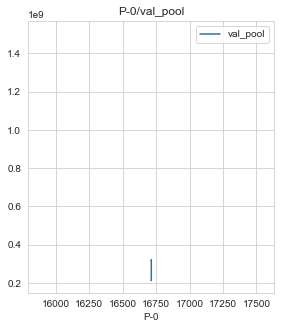

In [15]:
def val_pool_func(P, P_init, R):
    k = P/P_init
    return 2 * k * math.sqrt(k) / (k + 1) * P_init * R

plt.figure(figsize=(15,5))

#ax = plt.subplot(131, title='P-0/IL')
#LP1_merged_df[['IL','P-0']].astype(float).plot(ax=ax, y=['IL'], x='P-0', label=[])
ax = plt.subplot(131, title='P-0/val_pool')
LP1_merged_df[['val_pool','P-0']].astype(float).plot(ax=ax, y=['val_pool'], x='P-0', label=[])

#ax = plt.subplot(132, title='Theoretical')
x = LP1_merged_df['P-0'].tolist()
y = LP1_merged_df.apply(lambda x: val_pool_func(x['P-0'], initial_values['P'][0], LP1['omniR1']), axis=1)
#y = LP1_merged_df.apply(lambda x: val_pool_func(x['P-0'], initial_values['P'][0], x['R-0']), axis=1)
ax.plot(x, y, label='Theory')

#ax = plt.subplot(132, title='Theoretical')
#x = LP1_merged_df['P-0'].tolist()
#y = LP1_merged_df['P-0'].apply(lambda x: IL_func(x, 2, 0.5))
#ax.plot(x,y, label='Theory')

### Impermanent Loss

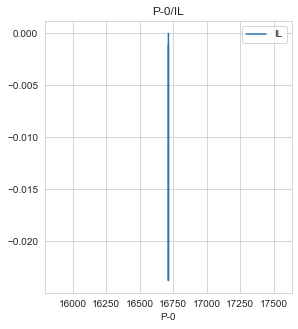

In [16]:
def IL_func(P, P_init, R):
    return val_pool_func(P, P_init, R)/val_hold_func(P, R) - 1

plt.figure(figsize=(15,5))

#ax = plt.subplot(131, title='P-0/IL')
#LP1_merged_df[['IL','P-0']].astype(float).plot(ax=ax, y=['IL'], x='P-0', label=[])
ax = plt.subplot(131, title='P-0/IL')
LP1_merged_df[['IL','P-0']].astype(float).plot(ax=ax, y=['IL'], x='P-0', label=[])

#ax = plt.subplot(132, title='Theoretical')
x = LP1_merged_df['P-0'].tolist()
y = LP1_merged_df.apply(lambda x: IL_func(x['P-0'], initial_values['P'][0], LP1['omniR1']), axis=1)
#y = LP1_merged_df.apply(lambda x: val_pool_func(x['P-0'], initial_values['P'][0], x['R-0']), axis=1)
ax.plot(x, y, label='Theory')

#ax = plt.subplot(132, title='Theoretical')
#x = LP1_merged_df['P-0'].tolist()
#y = LP1_merged_df['P-0'].apply(lambda x: IL_func(x, 2, 0.5))
#ax.plot(x,y, label='Theory')

In [17]:
LP1_merged_df[['val_pool', 'val_hold', 'R-0', 's-0', 'S-0', 'B-0', 'P-0', 'p-0']].tail()

val_pool     val_hold   R-0   s-0   S-0  B-0      P-0      p-0
9991 212496792.80 212734200.61  7000  7000  7000    0 16714.28 16714.28
9993 212496821.69 212734397.05  7000  7000  7000    0 16714.28 16714.28
9995 212496779.46 212734109.73  7000  7000  7000    0 16714.28 16714.28
9997 212496737.32 212733822.88  7000  7000  7000    0 16714.28 16714.28
9999 212496766.17 212734019.18  7000  7000  7000    0 16714.28 16714.28